#### This notebook serves to explore titanic data more in depth to discover more relationships between columns and survival rate

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set()

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

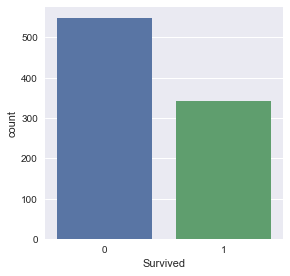

In [3]:
sns.factorplot(x='Survived', data=df_train, kind='count')

##### Now that we know the proportion of those who survived and those who didn't, we can make a baseline accuracy

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
numOfNonSurvivors = df_train[df_train['Survived'] == 0].Survived.count()
totalPassengers = df_train.PassengerId.count()

# baseline accuraccy by perdicting all passengers die
baselineAccuraccy = numOfNonSurvivors/totalPassengers
print(baselineAccuraccy)

0.616161616162


##### this means that the worse we can do by predicting that all passengers die is 61%
##### therefore, anything that we do to improve our model should be better than the baselineAccuraccy
##### we can start by looking and trying to find out certain relationships in the data wrt to survival of the passenger

## Age Vs Survival

##### now we see that, Age has over 100 missing values and we therefore must address this, but let's first take a look at the data and try to visualize it

In [6]:
print(df_train.Age.max())
print(df_train.Age.min())
print(df_train.Age.mean())

80.0
0.42
29.69911764705882


In [7]:
# we will extract the rows where Age is not Nan and look at its distribution 
df_Age_Not_Null = df_train[df_train.Age.isnull() == False]

In [8]:
df_Age_Not_Null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


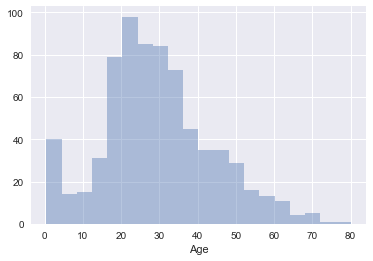

In [9]:
# now we have all the rows where Age is not null and we will look at its distribution
sns.distplot(a=df_Age_Not_Null['Age'], kde=False)

In [10]:
print('Min Age: ' , df_Age_Not_Null.Age.min())
print('Max Age: ' , df_Age_Not_Null.Age.max())
print('Median Age: ', df_Age_Not_Null.Age.median())
print('Mode Age: ',df_Age_Not_Null.Age.mode().loc[0])
print('=============')
df_Age_Not_Null[df_Age_Not_Null['Age'] == 24].info()

Min Age:  0.42
Max Age:  80.0
Median Age:  28.0
Mode Age:  24.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 89 to 864
Data columns (total 12 columns):
PassengerId    30 non-null int64
Survived       30 non-null int64
Pclass         30 non-null int64
Name           30 non-null object
Sex            30 non-null object
Age            30 non-null float64
SibSp          30 non-null int64
Parch          30 non-null int64
Ticket         30 non-null object
Fare           30 non-null float64
Cabin          9 non-null object
Embarked       30 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 3.0+ KB


#####  from the Age distribution, we can see that there are a lot of passengers in the 20 to 40 year-old range with 24 being the highest occuring age (30 people are aged 24)

##### now let's see the survival rate of the people wrt to Age (we will visualize this using striplot!!)

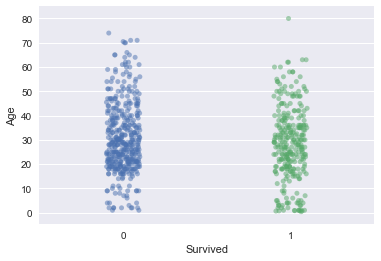

In [11]:
sns.stripplot(data=df_Age_Not_Null, x='Survived', y='Age', jitter=True, alpha=0.5)

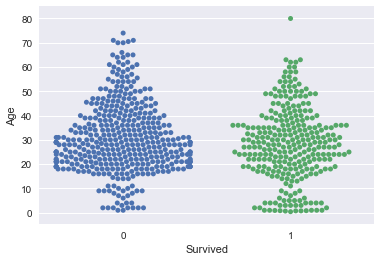

In [12]:
sns.swarmplot(x='Survived', y='Age', data=df_Age_Not_Null)

<p>From both the plots above, we can see that the survival rate for those in between their 20s and 40s are much higher than those in other age groups although death rate is also highest in this age group simply because this age group is the largest in the passenger population</p>

## Conclusion: survival rate for those in between their 20s and 40s are much higher than those in other age groups

# Sex vs Survival

<p>Now, we would also like to see if Sex has anything to do with Survival rate and if it does, is it also correlated with Age?</p>

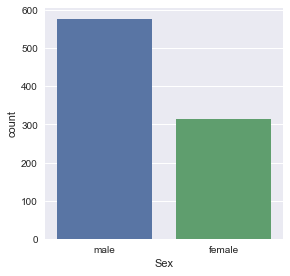

In [13]:
# first of all, let's view the male and female population in the passengers
sns.factorplot(x='Sex', data=df_train, kind='count')

<p>So there's a lot more male than females in the passenger population (note that we are using df_train)</p>
<p>Now, lets view the survival rate</p>

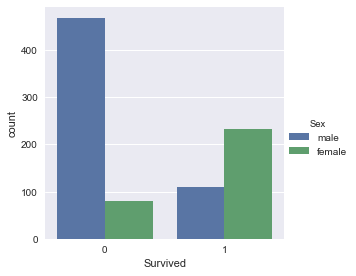

In [14]:
sns.factorplot(x='Survived', data=df_train, hue='Sex', kind='count')

<p>Looks like a lot more females survived compared to males. Maybe the males all ensured that their loved ones survive? Hard to say</p>
<p>Let's see if Age in the females also affected their survival rate</p>

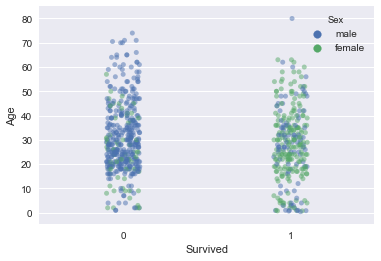

In [15]:
# we will be using df_Age_Not_Null since we also want to see relationship between Age, Sex and Survival
sns.stripplot(x='Survived', y='Age', hue='Sex', data=df_Age_Not_Null, jitter=True, alpha=0.5)

<p>From the plot above, we can see that most of the girls who survived are in the age between 20 and 40</p>

## conclusion: Females have a higher rate of Survival (highest survival rate for those in 20-40 )

## So we can say that Age, Sex are definitely related to Survival and we would have to account for this relationship when we try to account for the missing Age values later

<p>Enough about Age and Sex, let's also identify other possible relationships in the data df_train</p>

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Port of Embarkation Vs Survival
<p>Let's check out if port of embarkation (Embarked) is related to Survival rate</p>
##### Let's first view the distribution of Embarked in our data

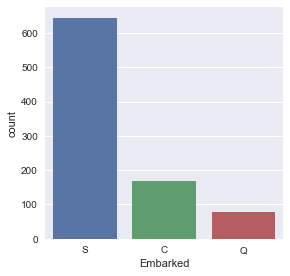

In [18]:
# C = Cherbourg, Q = Queenstown, S = Southampton
sns.factorplot(x='Embarked', data=df_train, kind='count')

##### Seems like most people embarked form Southampton. However, by the look of it, there are 2 missing values for Embarked, before imputing these values, lets view the exact rows with this missing value

In [19]:
df_train[df_train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


looks like both passengers have the same ticket number and fare as well, they even share the same cabin!! Both even Survived!!

we can try to find passengers with similar profiles and see what their embarkation port is and then determine if we should just fill the embarked using the mode value because it seems very tempting to do so just because most passengers embarked from there

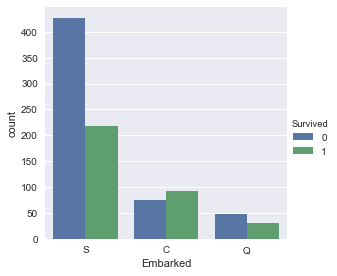

In [20]:
sns.factorplot(x='Embarked', hue='Survived',data=df_train, kind='count')

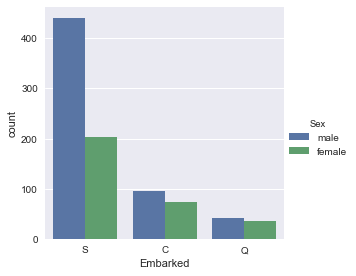

In [21]:
sns.factorplot(x='Embarked', hue='Sex',data=df_train, kind='count')

from both plots above, we can see that the survival rate is higher for those who embarked from C (cherbourg) and Q (queenstown) compared to S(southampton) although most survivors still come from Southampton by sheer number of passengers who boarded there

We can also see that proportion of women from embarking from C and Q is much higher than S although we can't deny that most women still embarked from S 

## Conclusion : survival rate is higher for those who embarked from C (cherbourg) and Q (queenstown) compared to S(southampton)

We can also try to see if fares have anything to do with port of embarkation 

Min Fare:  0.0
Max Fare:  512.3292
Mean Fare:  32.2042079685746


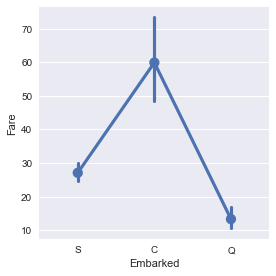

In [22]:
print('Min Fare: ',df_train.Fare.min())
print('Max Fare: ',df_train.Fare.max())
print('Mean Fare: ',df_train.Fare.mean())
sns.factorplot(x='Embarked', y='Fare', data=df_train, kind='point')

In [23]:
print(df_train[df_train['Embarked'] == 'S'].Fare.mean())
print(df_train[df_train['Embarked'] == 'C'].Fare.mean())
print(df_train[df_train['Embarked'] == 'Q'].Fare.mean())

27.07981180124218
59.95414404761905
13.276029870129872


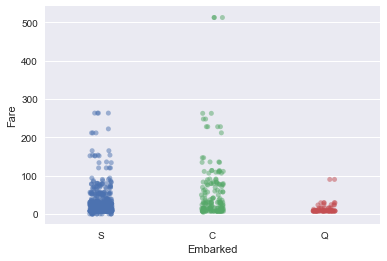

In [24]:
sns.stripplot(data=df_train, x='Embarked', y='Fare', jitter=True, alpha=0.5)

we can also combine a box plot and plot a swarmplot on top of it to view the distribution of fares for all 3 port of embarkation just by plotting both plots on the same grid (by putting them in the same cell) 

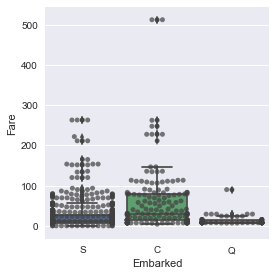

In [25]:
sns.factorplot(x='Embarked', y='Fare', data=df_train, kind='box')
sns.swarmplot(data=df_train, x='Embarked', y='Fare', alpha=0.7, color='0.25')

based on the plot above, we can conclude that on average, those who embarked from port C paid higher fares (surprisingly, those who embarked from this port also had a higher proportion of passengers who survived)

### we can also impute the Embarkation port of the 2 passengers with C and justify that this is because both passengers have survived and they paid higher fares which is closer to the average fare of C

## Conclusion: those who embarked from port C paid higher fares (surprisingly, those who embarked from this port also had a higher proportion of passengers who survived)

now, before we finally impute the missing values for Embarked for both passengers, let's try and also look at relationship between age and port of embarkation 

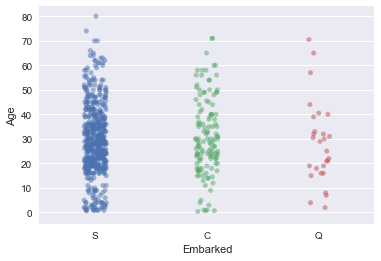

In [26]:
sns.stripplot(data=df_train, x='Embarked', y='Age', jitter=True, alpha=0.5)

not surprisingly, highest age group for ports S and C are within the 20-40 Age group (the same can actually be said for Q but the age distribution is a little sparse (spread out) for this port)

## Conclusion: All Ports seems to have similar age distributions and as such, we may conclude that there may not be much of a correlation between Age and port of Embarkation 

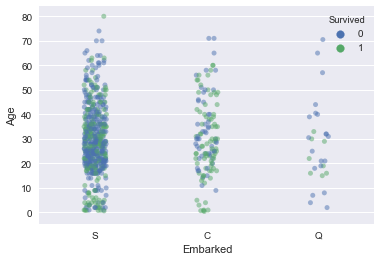

In [27]:
sns.stripplot(data=df_train, x='Embarked', y='Age', hue='Survived',jitter=True, alpha=0.5)

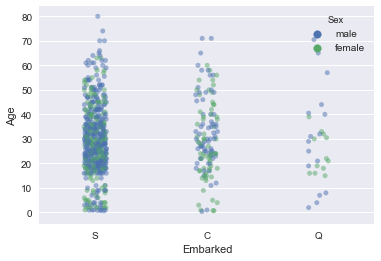

In [28]:
sns.stripplot(data=df_train, x='Embarked', y='Age', hue='Sex',jitter=True, alpha=0.5)

even if we included factors such as survival and sex, we can still see that there's not much of a difference in age and sex distribution for all ports and hence, we can safely say that there's not much of a correlation between age and sex with port of embarkation


## Conclusion: Not much of a correlation between age and sex with port of embarkation

now let's see if there's a correlation between Age, Fare and Survival Rate !! 

Note that we now know that people who embarked from C paid higher fares on average but i we take a closer look at the stripplot above which shows fares paid versus por of embarkation, there's only 2 people in C which paid really really high fares. This could be an outlier as to why average fare paid in C is higher. Regardless, we do not want to overcomplicate the analysis for now and we will leave it at that. 

Now, we shall just focus on Fare and Survival Rate

# Fare vs Survival

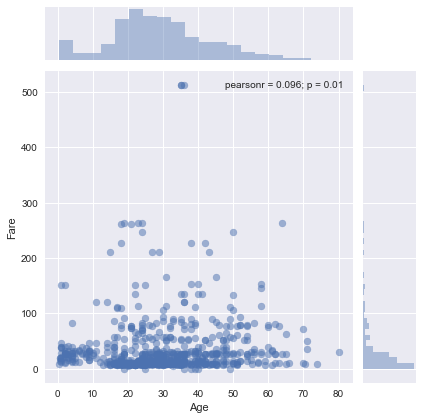

In [29]:
sns.jointplot(x='Age', y='Fare', data=df_train, alpha=0.5)

it seems that from the plot above, most people paid less than $100 in fares. Let's confirm this with a distribution plot

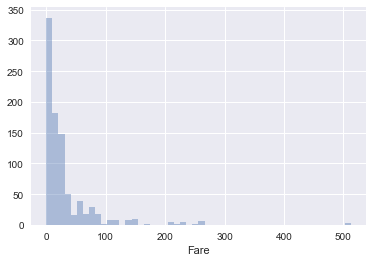

In [30]:
sns.distplot(a=df_train['Fare'], kde=False)

so now we see that most people paid less than $100 in fares. How does this affect survival ? Is there a relationship?

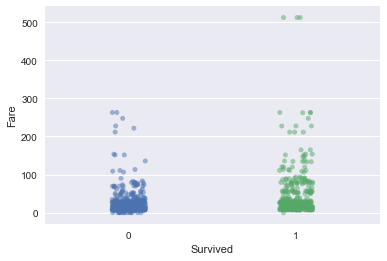

In [31]:
sns.stripplot(data=df_train,x='Survived', y='Fare', jitter=True, alpha=0.5)

from the stripplot above, we can see that those who survived paid higher fares on average vs those who didn't

we can also view this from distribution plot by plotting distribution plot of those who survived above the distribution plot of the entire passenger population

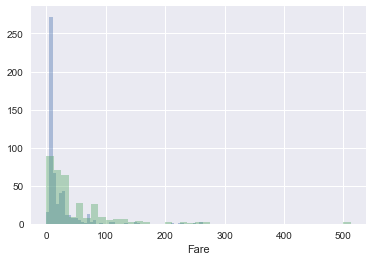

In [32]:
# this uses seaborn (plot the fare distribution for those who did not survive first)
sns.distplot(a=df_train[df_train['Survived'] == 0].Fare, kde=False)
# get the fares for only those who survived (plot them on top of those who did not survive)
sns.distplot(a=df_train[df_train['Survived'] == 1].Fare, kde=False)

# Higher green bars indicate that those who survived paid higher fares on average

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

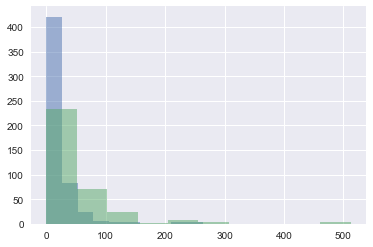

In [33]:
# this uses pandas' hist() method from Series object
df_train.groupby(df_train['Survived']).Fare.hist(alpha=0.5)

we can also view the Fare statistics between those who survived and those who didn't

In [34]:
df_train.groupby(df_train['Survived']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


we can see that those who survived has an average fare more than twice as much as those who didn't. Therefore, there's certainly a correlation between Fare and Survival rate

## Conclusion: Those who paid higher fare have bigger chances of survival

# Pclass vs Survival

let's see if there is any relationship between passenger class (Pclass) and Survival

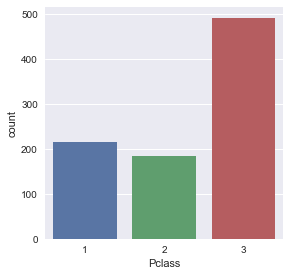

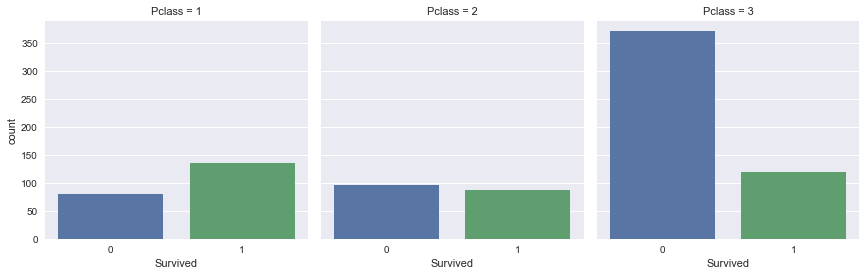

In [35]:
sns.factorplot(data=df_train ,x='Pclass', kind='count')
sns.factorplot(data=df_train, x='Survived', col='Pclass', kind='count')

we see that most passengers are in pclass 3 but those in pclass 1 has higher survival rate and there are even more survivors that come from pclass 1 than 3. So there's certainly a correlation between pclass and survival rate

## Conclusion: Passengers in pclass 1 are more likely to survive than those in other classes (about 50-50 for pclass 2)

# Relationship between Fare and Pclass with Survival rate

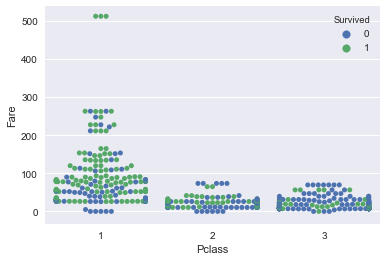

In [36]:
sns.swarmplot(data=df_train, x='Pclass', y='Fare', hue='Survived')

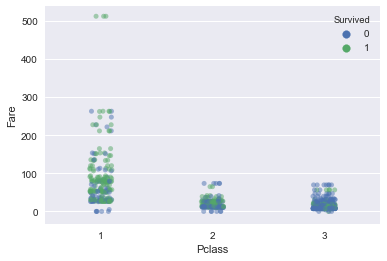

In [37]:
sns.stripplot(data=df_train, x='Pclass', y='Fare', hue='Survived', jitter=True, alpha=0.5)

In [38]:
df_train.groupby(['Pclass']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


## Conclusion: Those in Pclass 1 paid higher fares on average and people who paid higher fares have higher survival rate

# SibSp vs Survival

now, there's another column called sibsp and this is called sibling spouse and it represents the number of siblings and/or spouses that a passenger has on board with them

we would like to ascertain any relationship this has with survival rate of a passenger

let's first view the distribution

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

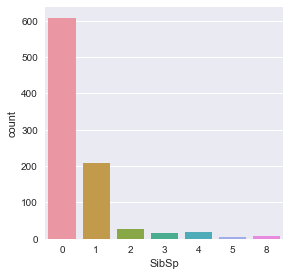

In [41]:
sns.factorplot(data=df_train, x='SibSp', kind='count')

seems like most people are alone. Let's view the distribution vs Survival


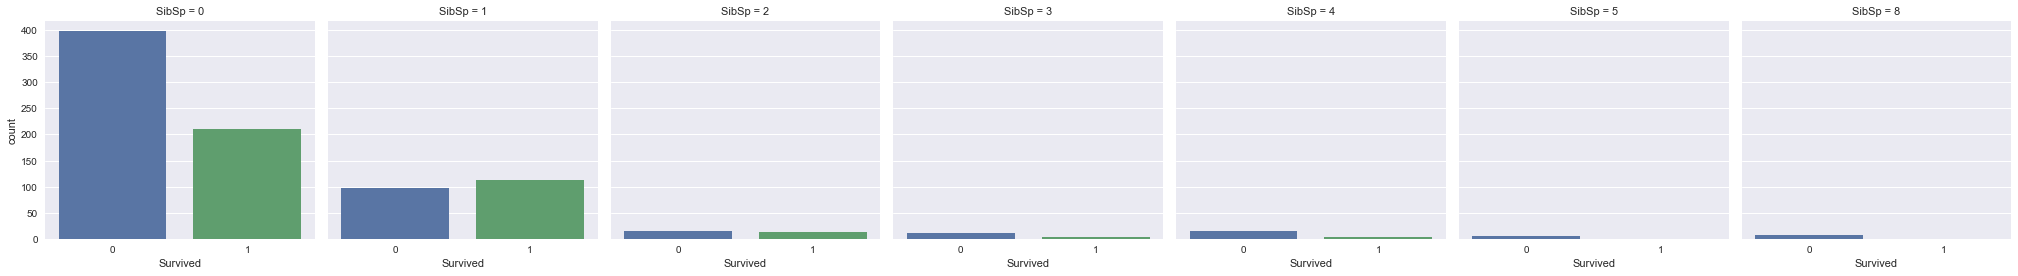

In [42]:
sns.factorplot(data=df_train, x='Survived', col='SibSp', kind='count')

seems like most survivors have at most 1 SibSp (perhaps it helps that they did not need to worry or save other family members other than themselves) 

Surprisingly, those with SibSp 1 have a higher survival rate (50-50 for SibSp 2) and this dramatically reduces with increase in SibSp

SibSp definitely affect a passenger's survival rate 

## Conclusion: Passengers with lower SibSp has higher survival rate

# Parch vs Survival 

let's do that same analysis for Parch since they essentially represent Parents and children on board with passengers (m=family members on board)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


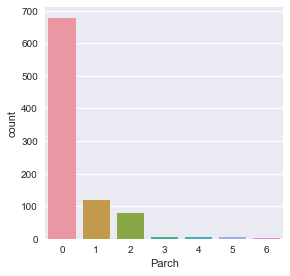

In [43]:
print(df_train.info())
print('=================')
print(df_train.Parch.describe())
sns.factorplot(data=df_train, x='Parch', kind='count')

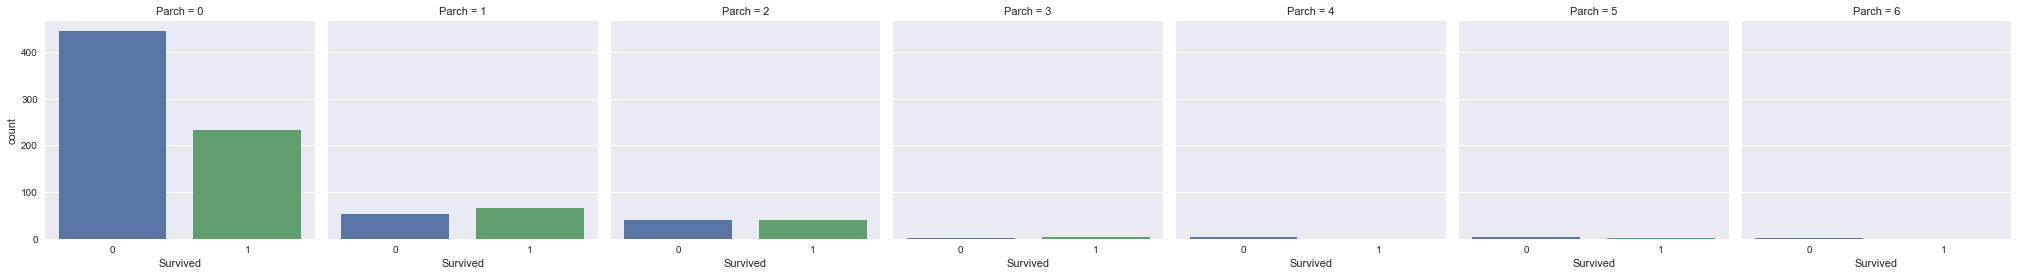

In [44]:
sns.factorplot(data=df_train, x='Survived', col='Parch', kind='count')

seems like most survivors have at most 1 Parch (perhaps it helps that they did not need to worry or save other family members other than themselves)

Surprisingly, those with Parch 1 have a higher survival rate (50-50 for Parch 2) and this dramatically reduces with increase in Parch

SibSp definitely affect a passenger's survival rate

## Conclusion: Passengers with lower Parch has higher survival rate¶

# Cabin vs Survival

Last but not least, we are going to analyse the relationship between cabin and survival rate 

now, we have left this till the end because there are just so many missing values for cabin (or maybe there's only 204 cabins on board and that the rest of the passengers do not have a cabin at all)

In [45]:
print(df_train.Cabin.describe())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object


In [46]:
# let's find out how many with cabin survived
df_train_w_cabin = df_train[df_train.Cabin.isnull() ==  False]

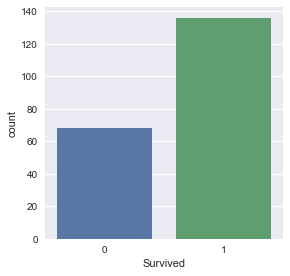

In [47]:
sns.factorplot(data=df_train_w_cabin, x='Survived', kind='count')

from the plot above, we see that there's a higher proportion of those with cabins survived

In [48]:
df_train_w_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


from the table above, we see that there are a few passengers with more than 1 cabin 

In [49]:
df_train_w_cabin.Cabin.str.split(' ', n=0)

1                [C85]
3               [C123]
6                [E46]
10                [G6]
11              [C103]
21               [D56]
23                [A6]
27     [C23, C25, C27]
31               [B78]
52               [D33]
54               [B30]
55               [C52]
61               [B28]
62               [C83]
66               [F33]
75            [F, G73]
88     [C23, C25, C27]
92               [E31]
96                [A5]
97          [D10, D12]
102              [D26]
110             [C110]
118         [B58, B60]
123             [E101]
124              [D26]
128           [F, E69]
136              [D47]
137             [C123]
139              [B86]
148               [F2]
            ...       
751             [E121]
759              [B77]
763         [B96, B98]
765              [D11]
772              [E77]
776              [F38]
779               [B3]
781              [B20]
782               [D6]
789         [B82, B84]
796              [D17]
802         [B96, B98]
806        

now that we manage to split the cabins into arrays, we can get the number of cabins and add them to the table for us to see if there's any relationship between number of cabins and survival rate

after splitting the cabins into individual arrays, we can then count the length of each array to determine how many cabins does each passenger has

In [50]:
print(type(df_train_w_cabin.Cabin.str.split(' ', n=0).apply(lambda x: len(x))))
numOfCabins = df_train_w_cabin.Cabin.str.split(' ', n=0).apply(lambda x: len(x))

<class 'pandas.core.series.Series'>


In [51]:
df_train_w_cabin.loc[:,'NumOfCabins'] = numOfCabins

/Library/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
df_train_w_cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumOfCabins
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,3
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1


now that we have added the NumOfCabins column to the dataframe, we can now analyse the relationship between this column and survival rate

In [53]:
df_train_w_cabin.NumOfCabins.describe()

count    204.000000
mean       1.166667
std        0.507740
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: NumOfCabins, dtype: float64

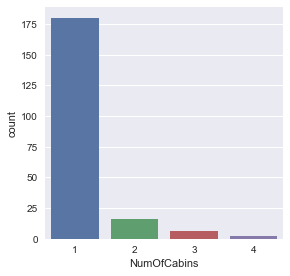

In [54]:
sns.factorplot(data=df_train_w_cabin, x='NumOfCabins', kind='count')

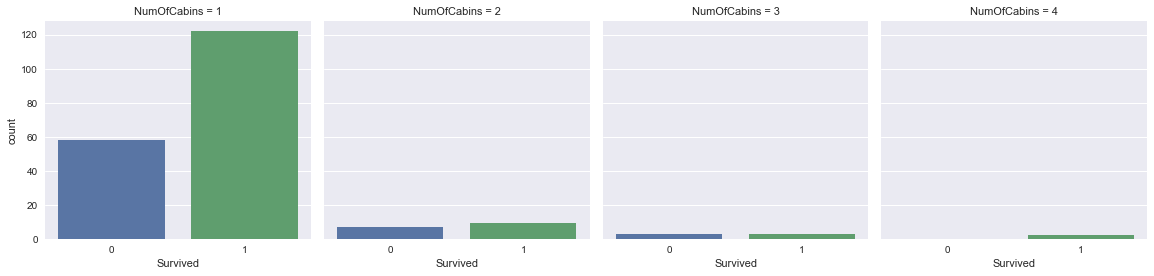

In [55]:
sns.factorplot(data=df_train_w_cabin, x='Survived', col='NumOfCabins', kind='count')

wow, it looks like people with cabins actually had higher survival rates. As can be seen in every column, more people survived than perished

now, let us compare between those who have cabins and those who do not

##### Note: For the purposes of comparison, we will assume that all passengers without cabins do not have a cabin. Therefore, they will have 0 as the number of cabins and the rest wilth cabins will be filled the their respective number of cabins

In [56]:
# create new column NumOfCabins for df_train and first fill those with cabins first 
# and then impute null values with 0 later
df_train['NumOfCabins'] = df_train_w_cabin.NumOfCabins

In [57]:
df_train.NumOfCabins.fillna(value=0, inplace=True)

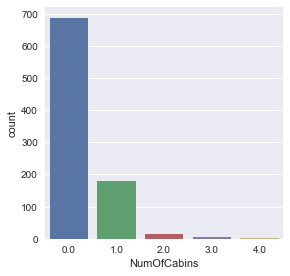

In [58]:
sns.factorplot(data=df_train, x='NumOfCabins', kind='count')

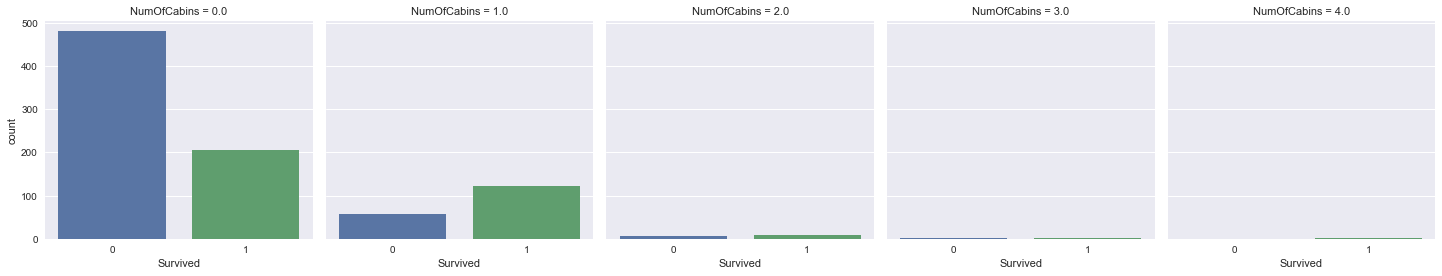

In [59]:
sns.factorplot(data=df_train, col='NumOfCabins' ,x='Survived', kind='count')

based on the plot above, it seems that those with cabins certainly has a higher rate of survival. We will certainly need to take this into account when we train our ML model.

### Conclusion: Passengers with cabin(s) have a higher rate of survival

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumOfCabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
